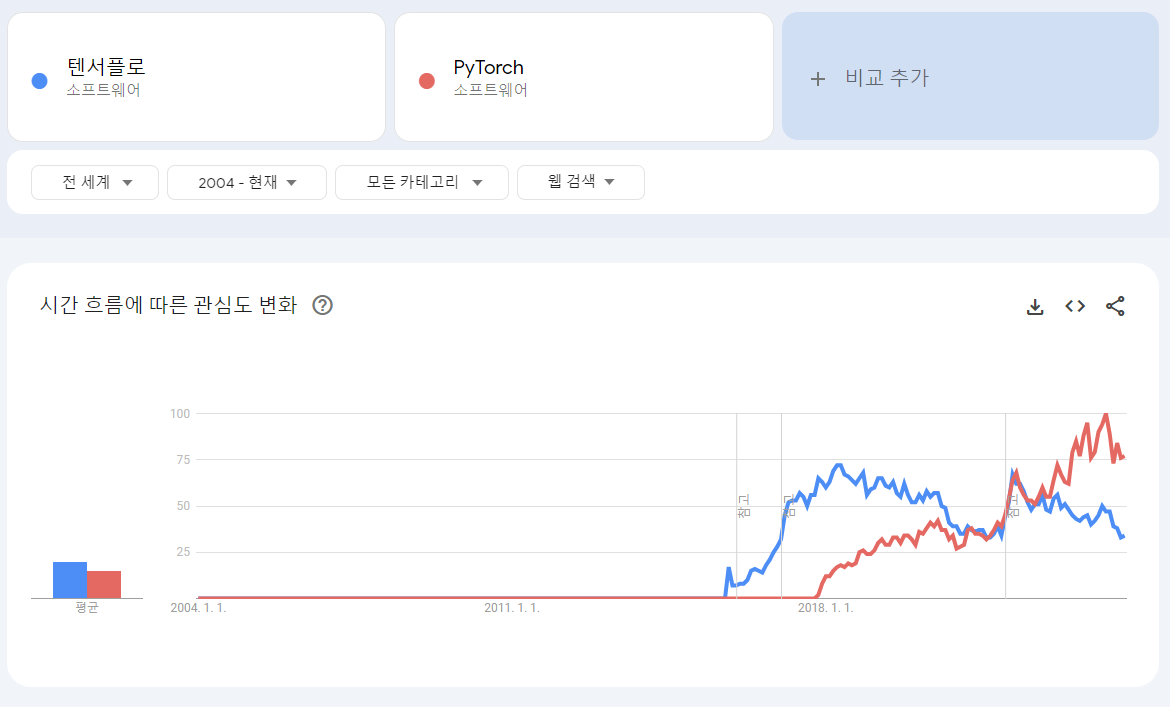

- 텐서플로가 사용이 편리했으나 사후지원 문제, 라이브러리 수정 어려움 등 문제 존재
- 파이토치는 사용이 더 복잡하지만오픈소스, 논문 등 사용으로 점차 활발해짐

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron # 퍼셉트론.. 단일신경망

In [10]:
iris = load_iris(as_frame=True)
X = iris.data.loc[:,['sepal length (cm)', 'sepal width (cm)']].to_numpy()
y = iris.target

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)
# 2개의 샘플로 예측
X_new = [[2,0.5],[3,1]]
per_clf.predict(X_new)

array([1, 1])

- 사이킷런으로 구현하는 딥러닝 다층 인공신경만 MLP

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection  import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score # 결정계수, 1에 가까울수록 좋음

In [16]:
df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [17]:
# X,y = df['data'], df['target']
X,y = df.data, df.target
print(f'original size {X.shape}')
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, random_state=42)
x_train.shape, x_val.shape, x_test.shape

original size (20640, 8)


((11610, 8), (3870, 8), (5160, 8))

In [21]:
# 모델
import time
start_time = time.time()
mlp_reg = MLPRegressor(hidden_layer_sizes=[16, 32, 64, 32, 10], random_state=42) # 레이어는 잘된 사례 참고 # random은 처음 가중치 랜덤하게
pipline = make_pipeline(StandardScaler(),mlp_reg)
pipline.fit(x_train,y_train)
y_pr = pipline.predict(x_test)
print(mean_squared_error(y_test, y_pr))
print(r2_score(y_test, y_pr))
end_time = time.time()
print(f'time : {end_time - start_time}')

0.28534623257582337
0.7843543467880835
time : 47.00236654281616


c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
import sklearn
print(sklearn.__version__)

1.5.1
